In [ ]:
%matplotlib inline

==========================
MS, 20190404

- Get 2D msftmz (AMOC) data, Calculate maximum of annual mean stream function with CDO

- Result: while numerical values are slightly different than in RTD, year-to-year variations are indistinguishable
- Result: reproduced plot that was made with 2_calc+plot_amoc_old.py (which calculated AMOC strength not with CDO but in python)
- 2_calc+plot_amoc_old2.py: changed order of calculation (maximum of monthly fields, then annual mean); this made a difference
                              and brought the results out of line of that in the RTD



In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec
################settings
mpl.style.reload_library()
plt.style.use('rms_paper')
#basedir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/'
#rundir=basedir+'/8CanESM25/';os.chdir(rundir)

registering cmaps
registering cmaps


1. Read DATA CanESM2 
#####################################################
TAS       

In [2]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG1_GMST+AMOC/';os.chdir(rundir)
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post/'

os.chdir(datadir + 'DATA_tas_canesm2')

ens_his_tas = cd.mkensemble('amgm_*historical-r*',prefix='amgm_')
ens_15c1_tas = cd.mkensemble('amgm_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
ens_15c2_tas = cd.mkensemble('amgm_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100
ens_20c1_tas = cd.mkensemble('amgm_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
ens_20c2_tas = cd.mkensemble('amgm_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100
ens_30c1_tas = cd.mkensemble('amgm_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
ens_30c2_tas = cd.mkensemble('amgm_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100

tas_his=cd.loadfiles(ens_his_tas,'tas')['data']
tas_15c1=cd.loadfiles(ens_15c1_tas,'tas')['data']
tas_20c1=cd.loadfiles(ens_20c1_tas,'tas')['data']
tas_30c1=cd.loadfiles(ens_30c1_tas,'tas')['data']

tas_15c2=cd.loadfiles(ens_15c2_tas,'tas')['data']
tas_20c2=cd.loadfiles(ens_20c2_tas,'tas')['data']
tas_30c2=cd.loadfiles(ens_30c2_tas,'tas')['data']

#TAS-pi         
os.chdir(datadir + 'DATA_TAS_PI')
ens_tas_pi=cd.mkensemble('amgm_tas_Amon*',prefix='amgm_')
tas_pi=cd.loadfiles(ens_tas_pi,'tas')['data']

#AMOC       
os.chdir(datadir +'DATA_msftmyz_canesm2')
ens_his_amoc = cd.mkensemble('amoc_nh_am_*historical-r*',prefix='amoc_nh_am_')
ens_15c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
ens_15c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100
ens_20c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
ens_20c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100
ens_30c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
ens_30c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100

amoc_his=cd.loadfiles(ens_his_amoc,'msftmyz')['data']
amoc_15c1=cd.loadfiles(ens_15c1_amoc,'msftmyz')['data']
amoc_15c2=cd.loadfiles(ens_15c2_amoc,'msftmyz')['data']
amoc_20c1=cd.loadfiles(ens_20c1_amoc,'msftmyz')['data']
amoc_20c2=cd.loadfiles(ens_20c2_amoc,'msftmyz')['data']
amoc_30c1=cd.loadfiles(ens_30c1_amoc,'msftmyza')['data']
amoc_30c2=cd.loadfiles(ens_30c2_amoc,'msftmyza')['data']

#Years#############################################
years_his=np.arange(1950,2061+1)
years_15c1=np.arange(2021,2100+1)
years_20c1=np.arange(2036,2100+1)
years_30c1=np.arange(2061,2100+1)
years2=np.arange(2101,2600+1)

tas_his=tas_his[:,0:111+1]
amoc_his=amoc_his[:,0:111+1]

#GMST cf PI###########################################
tas_his=tas_his-np.mean(tas_pi)
tas_15c1=tas_15c1-np.mean(tas_pi)
tas_20c1=tas_20c1-np.mean(tas_pi)
tas_30c1=tas_30c1-np.mean(tas_pi)

tas_15c2=tas_15c2-np.mean(tas_pi)
tas_20c2=tas_20c2-np.mean(tas_pi)
tas_30c2=tas_30c2-np.mean(tas_pi)


This ensemble contains:
1 variables
1 models
5 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details 

2. Read DATA CanESM5 
#####################################################

In [3]:
#TAS       
os.chdir(datadir+'DATA_tas_canesm5')

ens_his=rut.cd_mkensemble('gmam_*_esm-1pctCO2*',prefix='gmam_',mip='cmip6')
ens_15c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-750PgC*',prefix='gmam_',mip='cmip6')
ens_20c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-1000PgC*',prefix='gmam_',mip='cmip6')
ens_30c=rut.cd_mkensemble('gmam_*_esm-1pct-brch-1500PgC*',prefix='gmam_',mip='cmip6')

tas_his5=cd.loadfiles(ens_his,'tas')['data']
tas_15c5=cd.loadfiles(ens_15c,'tas')['data']
tas_20c5=cd.loadfiles(ens_20c,'tas')['data']
tas_30c5=cd.loadfiles(ens_30c,'tas')['data']

#tas0=np.mean(tas_his5[:,0])
tas0=np.mean(tas_his5[:,0:10])

tas_his5=tas_his5-tas0
tas_15c5=tas_15c5-tas0
tas_20c5=tas_20c5-tas0
tas_30c5=tas_30c5-tas0


#AMOC       
os.chdir(datadir+'DATA_msftmyz_canesm5')


ens_his=rut.cd_mkensemble('amoc_nh_am_*_esm-1pctCO2*',prefix='amoc_nh_am_',mip='cmip6')
ens_15c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-750PgC*',prefix='amoc_nh_am_',mip='cmip6')
ens_20c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-1000PgC*',prefix='amoc_nh_am_',mip='cmip6')
ens_30c=rut.cd_mkensemble('amoc_nh_am_*_esm-1pct-brch-1500PgC*',prefix='amoc_nh_am_',mip='cmip6')

amoc_his5=cd.loadfiles(ens_his,'msftmz')['data']
amoc_15c5=cd.loadfiles(ens_15c,'msftmz')['data']
amoc_20c5=cd.loadfiles(ens_20c,'msftmz')['data']
amoc_30c5=cd.loadfiles(ens_30c,'msftmz')['data']

os.chdir(rundir)
#Years#############################################
years_his5=np.arange(1850,1931+1)-1850
years_15c5=np.arange(1901,2150+1)-1850
years_20c5=np.arange(1911,2150+1)-1850
years_30c5=np.arange(1931,2150+1)-1850

tas_his5=tas_his5[:,0:81+1]
amoc_his5=amoc_his5[:,0:81+1]


This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.

3. Plot 
#####################################################

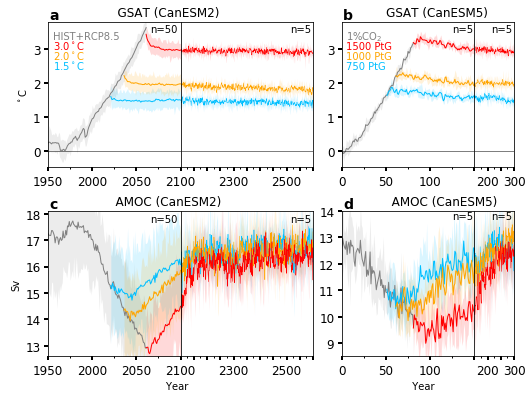

In [4]:
x1=0.02
x2=0.48
x3=0.53
x4=0.76
x5=x4+(150./500)*(x4-x3)
fig = plt.figure(constrained_layout=False,figsize=(8,8))
gs1 = gridspec.GridSpec(nrows=2, ncols=2, left=x1, right=x2,
                        wspace=0,hspace=0.3,bottom=0.3)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])


gs2 = gridspec.GridSpec(nrows=2, ncols=1, left=x3, right=x4,
                        wspace=0,hspace=0.3,bottom=0.3)
ax5 = fig.add_subplot(gs2[0])
ax7 = fig.add_subplot(gs2[1])

gs3 = gridspec.GridSpec(nrows=2, ncols=1, left=x4, right=x5,
                        wspace=0,hspace=0.3,bottom=0.3)
ax6 = fig.add_subplot(gs3[0])
ax8 = fig.add_subplot(gs3[1])



####### plot
def plot_x(ax,years,x,color,linewidth):
  kwargs={'linewidth': linewidth, 'color': color}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)
  #kwargs={'color':color, 'alpha': 0.25, 'linewidth': 0}
  #ax.fill_between(years,np.mean(x,axis=0)-np.std(x,axis=0), np.mean(x,axis=0)+np.std(x,axis=0),**kwargs)

##Column 1: CanESM2######################################
#######################################################

def set_xaxis1 (ax):
  ax.set_xlim([1950, 2100]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 

def set_xaxis2 (ax):
  ax.set_xlim([2100, 2600]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','','','','2300','','','','2500'))


##ROW 1: GMST############################################
#######################################################

#1950-2100############################################
ax=ax1
set_xaxis1(ax)
ax.set_ylim([-0.5, 3.8])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_ylabel('$^\circ$C')

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)
#ax.axhline(y=1.5,color="black",linewidth=0.5)
#ax.axhline(y=2.0,color="black",linewidth=0.5)
#ax.axhline(y=3.0,color="black",linewidth=0.5)


####### plot
plot_x(ax,years_his,tas_his,'gray',1)
plot_x(ax,years_15c1,tas_15c1,'deepskyblue',1)
plot_x(ax,years_20c1,tas_20c1,'orange',1)
plot_x(ax,years_30c1,tas_30c1,'red',1)


##legend##
ax.text(2065,3.5,'n=50',color= 'black')

ax.text(1955,3.3,'HIST+RCP8.5',color= 'gray')
ax.text(1955,3,'3.0$^\circ$C',color= 'red')
ax.text(1955,2.7,'2.0$^\circ$C',color= 'orange')
ax.text(1955,2.4,'1.5$^\circ$C',color= 'deepskyblue')

rpl.add_title(ax1,'                            GSAT (CanESM2)','a')
#2100-2600############################################
ax=ax2
set_xaxis2(ax)

ax.set_ylim([-0.5, 3.8])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

#ax.axhline(y=1.5,color="black",linewidth=0.5,linestyle='--')
#ax.axhline(y=2.0,color="black",linewidth=0.5,linestyle='--')
#ax.axhline(y=3.0,color="black",linewidth=0.5,linestyle='--')

####### plot                                
plot_x(ax,years2,tas_15c2,'deepskyblue',0.5)
plot_x(ax,years2,tas_20c2,'orange',0.5)
plot_x(ax,years2,tas_30c2,'red',0.5)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)
##legend##
ax.text(2515,3.5,'n=5',color= 'black')

##ROW 2: AMOC############################################
#######################################################


#1950-2100############################################
ax=ax3
set_xaxis1(ax)

ax.set_ylim([12.6, 18.1])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_ylabel('Sv')
    
####### plot
plot_x(ax,years_his,amoc_his,'gray',1)
plot_x(ax,years_30c1,amoc_30c1,'red',1)
plot_x(ax,years_15c1,amoc_15c1,'deepskyblue',1)
plot_x(ax,years_20c1,amoc_20c1,'orange',1)

####### title
ax.set_xlabel('                                        Year')
rpl.add_title(ax3,'                            AMOC (CanESM2)','c')

##legend##
ax.text(2065,17.7,'n=50',color= 'black')

#2100-2600############################################
ax=ax4
set_xaxis2(ax)

ax.set_ylim([12.6, 18.1])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
####### plot                                
plot_x(ax,years2,amoc_15c2,'deepskyblue',0.5)
plot_x(ax,years2,amoc_20c2,'orange',0.5)
plot_x(ax,years2,amoc_30c2,'red',0.5)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)
##legend##
ax.text(2515,17.7,'n=5',color= 'black')

#Column 2: CanESM5######################################
#######################################################

def set_xaxis1 (ax):
  ax.set_xlim([0, 150]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','0','50','100'))

def set_xaxis2 (ax):
  ax.set_xlim([150, 300]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','200','','300'))



#1950-2100############################################
ax=ax5
set_xaxis1(ax)

ax.set_ylim([-0.5, 3.8])
ax.yaxis.set_major_locator(MultipleLocator(1))
    
##Plot- year 1-150###
plot_x(ax,years_his5,tas_his5,'grey',1)
plot_x(ax,years_15c5,tas_15c5,'deepskyblue',1)
plot_x(ax,years_20c5,tas_20c5,'orange',1)
plot_x(ax,years_30c5,tas_30c5,'red',1)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)

##legend##
ax.text(5,3.3,'1%CO$_2$',color= 'gray')
ax.text(5,3.0,'1500 PtG',color= 'red')
ax.text(5,2.7,'1000 PtG',color= 'orange')
ax.text(5,2.4,'750 PtG',color= 'deepskyblue')
##title##
rpl.add_title(ax,'               GSAT (CanESM5)','b')
##legend##
ax.text(125,3.5,'n=5',color= 'black')

##Plot- year 150-300###
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.5, 3.8])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his5,tas_his5,'grey',0.5)
plot_x(ax,years_15c5,tas_15c5,'deepskyblue',0.5)
plot_x(ax,years_20c5,tas_20c5,'orange',0.5)
plot_x(ax,years_30c5,tas_30c5,'red',0.5)

##linec##
ax.axhline(y=0,color="black",linewidth=0.5)

##legend##
ax.text(215,3.5,'n=5',color= 'black')


##ROW 2: AMOC############################################
#######################################################

#1950-2100############################################
ax=ax7
set_xaxis1(ax)
ax.set_ylim([8.5, 14])
ax.yaxis.set_major_locator(MultipleLocator(1))
    
####### plot
plot_x(ax,years_his5,amoc_his5,'grey',1)
plot_x(ax,years_15c5,amoc_15c5,'deepskyblue',1)
plot_x(ax,years_20c5,amoc_20c5,'orange',1)
plot_x(ax,years_30c5,amoc_30c5,'red',1)

rpl.add_title(ax,'                   AMOC (CanESM5)','d')
ax.set_xlabel('          Year')
##legend##
ax.text(125,13.7,'n=5',color= 'black')

##Plot- year 150-300###
ax=ax8
set_xaxis2(ax)
ax.set_ylim([8.5, 14])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his5,amoc_his5,'grey',0.5)
plot_x(ax,years_15c5,amoc_15c5,'deepskyblue',0.5)
plot_x(ax,years_20c5,amoc_20c5,'orange',0.5)
plot_x(ax,years_30c5,amoc_30c5,'red',0.5)
##legend##
ax.text(215,13.7,'n=5',color= 'black')

#title############################################

#save############################################
rpl.mysavefig(fig,'PLOTS/fig1.png')
rpl.mysavefig(fig,'PLOTS/fig1.pdf')

WRITE DATA - CanESM2###################################
#######################################################

In [8]:
years_15c1=np.arange(2021,2100+1)
years_20c1=np.arange(2036,2100+1)
years_30c1=np.arange(2061,2100+1)
years2=np.arange(2101,2600+1)


text_file = open("DATA/stabilization2.txt", "w")

#1.5C#############
text_file.write("===============1.5C=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_15c1)[0]):
    text_file.write("%4.0f"%(years_15c1[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_15c1[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_15c1[:,i],axis=0)) + '\n')
for i in range(np.shape(years2)[0]):
    text_file.write("%4.0f"%(years2[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_15c2[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_15c2[:,i],axis=0)) + '\n')



#2.0C#############
text_file.write("===============2.0C=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_20c1)[0]):
    text_file.write("%4.0f"%(years_20c1[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_20c1[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_20c1[:,i],axis=0)) + '\n')
for i in range(np.shape(years2)[0]):
    text_file.write("%4.0f"%(years2[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_20c2[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_20c2[:,i],axis=0)) + '\n')

#3.0C#############
text_file.write("===============3.0C=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_30c1)[0]):
    text_file.write("%4.0f"%(years_30c1[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_30c1[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_30c1[:,i],axis=0)) + '\n')
for i in range(np.shape(years2)[0]):
    text_file.write("%4.0f"%(years2[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_30c2[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_30c2[:,i],axis=0)) + '\n')

#2.0C#############
text_file.close()

WRITE DATA - CanESM2-EQUI##############################
#######################################################

In [11]:
text_file = open("DATA/amoc_stabilization2_equi.txt", "w")
amoc_his=np.mean(amoc_his[:,0:50])
amoc_15c=np.mean(amoc_15c2[:,-50::])
amoc_20c=np.mean(amoc_20c2[:,-50::])
amoc_30c=np.mean(amoc_30c2[:,-50::])

text_file.write('AMOC his:'+ "%5.3f"%(amoc_his) + '\n\n')
text_file.write('AMOC 15c:'+ "%5.3f"%(amoc_15c) + '\n')
text_file.write('AMOC 15c-his:'+ "%5.3f"%((amoc_15c-amoc_his)*100/amoc_his) + '%\n\n')

text_file.write('AMOC 20c:'+ "%5.3f"%(amoc_20c) + '\n')
text_file.write('AMOC 20c-his:'+ "%5.3f"%((amoc_20c-amoc_his)*100/amoc_his) + '%\n\n')

text_file.write('AMOC 30c:'+ "%5.3f"%(amoc_30c) + '\n')
text_file.write('AMOC 30c-clim:'+ "%5.3f"%((amoc_30c-amoc_his)*100/amoc_his) + '%\n\n')

text_file.write('AMOC 20c-15c:'+ "%5.3f"%((amoc_20c-amoc_15c)*100/amoc_15c) + '%\n')
text_file.write('AMOC 30c-15c:'+ "%5.3f"%((amoc_30c-amoc_15c)*100/amoc_15c) + '%\n')


text_file.close()


WRITE DATA - CanESM5###################################
#######################################################

In [12]:


text_file = open("DATA/stabilization5.txt", "w")

#1.5C#############
text_file.write("===============750PgC=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_15c5)[0]):
    text_file.write("%4.0f"%(years_15c5[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_15c5[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_15c5[:,i],axis=0)) + '\n')

#2.0C#############
text_file.write("===============1000PgC=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_20c5)[0]):
    text_file.write("%4.0f"%(years_20c5[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_20c5[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_20c5[:,i],axis=0)) + '\n')

#3.0C#############
text_file.write("===============1500PgC=======================" + '\n')

text_file.write("year  tas     amoc" + '\n')

for i in range(np.shape(years_30c5)[0]):
    text_file.write("%4.0f"%(years_30c5[i]) + '  ' 
    +"%4.2f"%(np.mean(tas_30c5[:,i],axis=0)) + '  ' 
    +"%4.2f"%(np.mean(amoc_30c5[:,i],axis=0)) + '\n')

#2.0C#############
text_file.close()
